# Discription :
This program uses an artificial recurrent neural network based on Long Short Term Memory (LSTM).


In [1]:
#Import libraries

import math
import pandas as pd
import numpy as np
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

C:\Users\Sunil\.conda\envs\tensorenv\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
Using TensorFlow backend.


In [2]:
df = web.DataReader("AAPL" , data_source = "yahoo" , start ="2012-01-01", end = "2020-06-30")
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,50.857235
2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,51.130558
2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,51.698215
2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,52.238651
2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,52.155792
...,...,...,...,...,...,...
2020-06-24,368.790009,358.519989,365.000000,360.059998,48155800.0,360.059998
2020-06-25,365.000000,357.570007,360.700012,364.839996,34380600.0,364.839996
2020-06-26,365.320007,353.019989,364.410004,353.630005,51314200.0,353.630005


In [3]:
df.shape

(2137, 6)

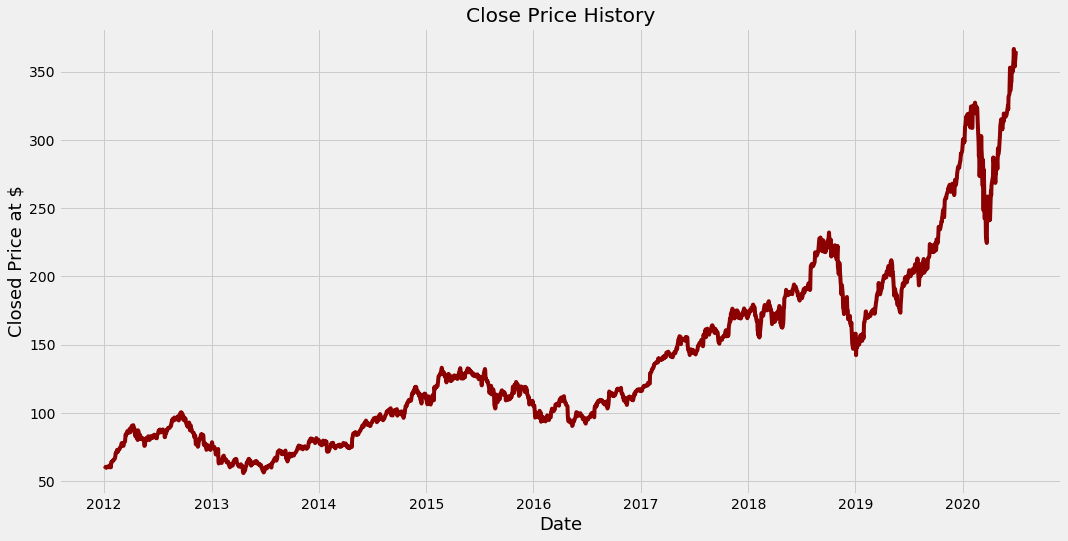

In [4]:
# visualize the closing price history
plt.figure(figsize = (16,8))
plt.title("Close Price History")
plt.plot(df["Close"], color="darkred")
#plt.plot(df["Open"], color="lightblue")
plt.xlabel("Date", fontsize = 18)
plt.ylabel("Closed Price at $", fontsize = 18 )
plt.show()

In [5]:
# create a new dataframe with column_name "Close"
data = df.filter(["Close"])

# Convert the dataframe to a numpy array
dataset = data.values

# set to train data
training_data_len = math.ceil(len(dataset)*0.8)
training_data_len, dataset


(1710,
 array([[ 58.74714279],
        [ 59.06285858],
        [ 59.71857071],
        ...,
        [353.63000488],
        [361.77999878],
        [364.79998779]]))

In [6]:
# scale the data
scaler = MinMaxScaler(feature_range = (0, 1))
scaled_data = scaler.fit_transform(dataset)
scaled_data


array([[0.00951645],
       [0.01053246],
       [0.01264263],
       ...,
       [0.95848621],
       [0.98471391],
       [0.99443261]])

In [7]:
# create the training dataset
# create scaled train dataset
train_data = scaled_data[0:training_data_len , : ]

# split the data into x_train and y_train dataset
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60: i, 0])
    y_train.append(train_data[i, 0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([0.00951645, 0.01053246, 0.01264263, 0.01465166, 0.01434364,
       0.01503783, 0.01472061, 0.01418732, 0.01346096, 0.01570904,
       0.01773646, 0.01711123, 0.01368622, 0.01695491, 0.01373679,
       0.02580476, 0.0248715 , 0.0260898 , 0.02872405, 0.03031932,
       0.030186  , 0.02969409, 0.03179047, 0.03376271, 0.03599702,
       0.03960592, 0.0471869 , 0.04730183, 0.05152218, 0.05467593,
       0.04925568, 0.05134287, 0.0513015 , 0.0571539 , 0.05632177,
       0.05786186, 0.06062945, 0.06216957, 0.06660598, 0.06983791,
       0.07077114, 0.07109757, 0.06557159, 0.06423835, 0.06443605,
       0.06963101, 0.07109297, 0.07423292, 0.08163462, 0.09150967,
       0.08966154, 0.08966613, 0.09680578, 0.09904007, 0.0974494 ,
       0.09599666, 0.09448414, 0.09950899, 0.102957  , 0.10440056])]
[0.10083302902752131]



In [8]:
# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

x_train.shape , y_train.shape

((1650, 60), (1650,))

In [9]:
# reshape the data as requires 3D data during neural netwoking
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

x_train.shape

(1650, 60, 1)

In [10]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50,return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [11]:
# Compile the model
model.compile(optimizer = "adam", loss="mean_squared_error")

In [12]:
# train the model
model.fit(x_train, y_train, batch_size =1 , epochs =1)

Epoch 1/1
1650/1650 [==============================] - 105s 64ms/step - loss: 4.4784e-04


In [13]:
# create the testing dataset 
# create a new array containing scaled values from index 1650 to 2003

test_data = scaled_data[training_data_len-60 : , :]

# create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len : , :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [14]:
# convert the data to a numpy array
x_test = np.array(x_test)
x_test.shape, x_test

((427, 60),
 array([[0.44741587, 0.44545281, 0.43505823, ..., 0.51995237, 0.53536717,
         0.5322778 ],
        [0.44545281, 0.43505823, 0.43161487, ..., 0.53536717, 0.5322778 ,
         0.5156401 ],
        [0.43505823, 0.43161487, 0.43283772, ..., 0.5322778 , 0.5156401 ,
         0.52622771],
        ...,
        [0.59573922, 0.60867604, 0.59734828, ..., 1.        , 0.97917873,
         0.99456136],
        [0.60867604, 0.59734828, 0.66512197, ..., 0.97917873, 0.99456136,
         0.95848621],
        [0.59734828, 0.66512197, 0.65533885, ..., 0.99456136, 0.95848621,
         0.98471391]]))

In [15]:
# reshape the x_test data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape
                    

(427, 60, 1)

In [16]:
# get the models predicted values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [17]:
# get the root mean square error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

5.733474338361754

C:\Users\Sunil\.conda\envs\tensorenv\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


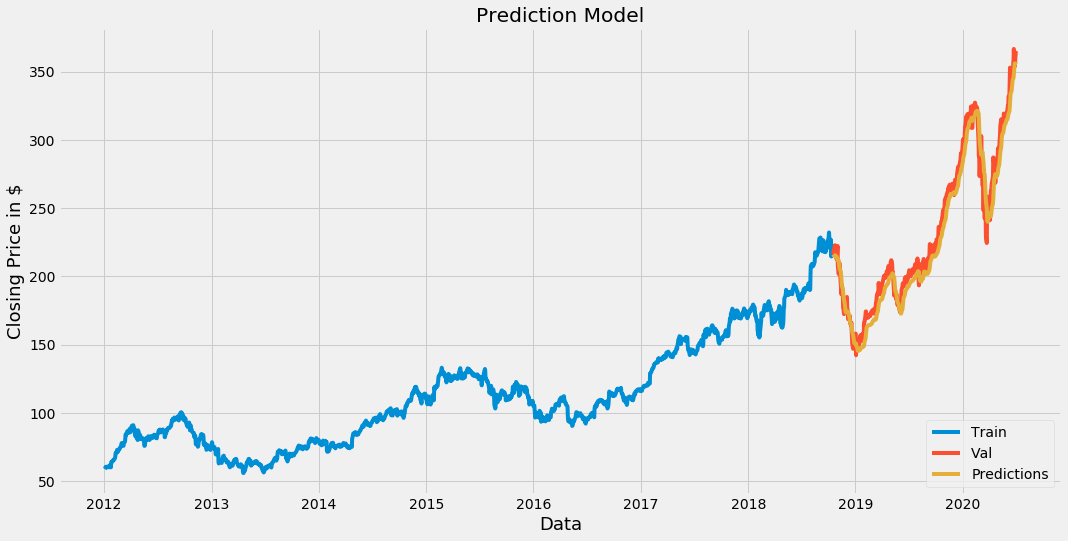

In [18]:
# plot the model
train = data[: training_data_len]
valid = data[training_data_len :]
valid["Predictions"] = predictions

# visualization
plt.figure(figsize = (16, 8))
plt.title("Prediction Model")
plt.xlabel("Data", fontsize = 18)
plt.ylabel("Closing Price in $", fontsize = 18)
plt.plot(train["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Train",'Val', 'Predictions'], loc = "lower right")
plt.show()

In [19]:
# show the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-10-18,216.020004,215.904678
2018-10-19,219.309998,215.323532
2018-10-22,220.649994,215.006561
2018-10-23,222.729996,215.007782
2018-10-24,215.089996,215.420517
...,...,...
2020-06-24,360.059998,350.920563
2020-06-25,364.839996,353.336853
2020-06-26,353.630005,355.756317


In [21]:
# get the quote
apple_quote = web.DataReader("AAPL", data_source = "yahoo", start="2012-01-01", end = "2020-07-10")


# new df variable
df_new = apple_quote.filter(['Close'])

# get last 60 price and convert to numpy
last_60_days = df_new[-60:].values

# scalling the last_60_days data
last_60_scaled = scaler.transform(last_60_days)

x_test = []
x_test.append(last_60_scaled)

# convert to numpy
x_test = np.array(x_test)

# reshape
x_test=np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

# predict the price
pred_price = model.predict(x_test)

# undo scalling
pred_price = scaler.inverse_transform(pred_price)

print(pred_price)

[[373.8503]]


In [26]:
# actual closing pring oo 2020-07-11
apple_quote0 = web.DataReader("AAPL", data_source = "yahoo", start="2012-01-01", end = "2020-07-11")
print(apple_quote0['Close'][-1])

383.67999267578125
